In [1]:
import pandas as pd

# Load data dari Excel

df = pd.read_excel("Improving Employee Retention by Predicting Employee Attrition Using Machine Learning.xlsx")

# Tampilkan 5 data teratas untuk gambaran umum
df.head()



Username  EnterpriseID StatusPernikahan JenisKelamin  \
0  spiritedPorpoise3        111065    Belum_menikah         Pria   
1    jealousGelding2        106080    Belum_menikah         Pria   
2      pluckyMuesli3        106452          Menikah         Pria   
3   stressedTruffle1        106325    Belum_menikah         Pria   
4        shyTermite7        111171    Belum_menikah       Wanita   

  StatusKepegawaian                      Pekerjaan           JenjangKarir  \
0         Outsource   Software Engineer (Back End)  Freshgraduate_program   
1          FullTime                   Data Analyst  Freshgraduate_program   
2          FullTime  Software Engineer (Front End)  Freshgraduate_program   
3         Outsource  Software Engineer (Front End)  Freshgraduate_program   
4          FullTime                Product Manager  Freshgraduate_program   

  PerformancePegawai     AsalDaerah     HiringPlatform  ...         NomorHP  \
0       Sangat_bagus  Jakarta Timur  Employee_Referral  ...  +6282232522xxx   
1      Sangat_kurang  Jakarta Utara            Website  ...  +6281270745xxx   
2              Bagus  Jakarta Timur             Indeed  ...  +6281346215xxx   
3              Bagus  Jakarta Pusat           LinkedIn  ...  +6283233846xxx   
4              Bagus  Jakarta Timur           LinkedIn  ...  +6287883263xxx   

                             Email  TingkatPendidikan  PernahBekerja  \
0   spiritedPorpoise3135@yahoo.com           Magister              1   
1     jealousGelding2239@yahoo.com            Sarjana              1   
2      pluckyMuesli3961@icloud.com           Magister              1   
3  stressedTruffle1406@hotmail.com            Sarjana              1   
4         shyTermite7149@gmail.com            Sarjana              1   

   IkutProgramLOP   AlasanResign TanggalLahir TanggalHiring  \
0             1.0  masih_bekerja   1972-07-01    2011-01-10   
1             1.0  toxic_culture   1984-04-26    2014-01-06   
2             1.0      jam_kerja   1974-01-07    2011-01-10   
3             0.0  masih_bekerja   1979-11-24     2014-2-17   
4             0.0    ganti_karir   1974-11-07    2013-11-11   

  TanggalPenilaianKaryawan  TanggalResign  
0                2016-2-15              -  
1                2020-1-17      2018-6-16  
2               2016-01-10      2014-9-24  
3               2020-02-04              -  
4                2020-1-22     2018-09-06  

[5 rows x 25 columns]

In [2]:
df.describe()

EnterpriseID  SkorSurveyEngagement  SkorKepuasanPegawai  \
count     287.000000            287.000000           282.000000   
mean   105923.324042              3.101045             3.904255   
std      4044.977599              0.836388             0.913355   
min    100282.000000              1.000000             1.000000   
25%    101269.000000              3.000000             3.000000   
50%    106069.000000              3.000000             4.000000   
75%    110514.500000              4.000000             5.000000   
max    111703.000000              5.000000             5.000000   

       JumlahKeikutsertaanProjek  JumlahKeterlambatanSebulanTerakhir  \
count                 284.000000                          286.000000   
mean                    1.179577                            0.412587   
std                     2.294441                            1.275016   
min                     0.000000                            0.000000   
25%                     0.000000                            0.000000   
50%                     0.000000                            0.000000   
75%                     0.000000                            0.000000   
max                     8.000000                            6.000000   

       JumlahKetidakhadiran  IkutProgramLOP  
count            281.000000       29.000000  
mean              10.448399        0.517241  
std                6.902252        0.508548  
min                1.000000        0.000000  
25%                5.000000        0.000000  
50%               10.000000        1.000000  
75%               15.000000        1.000000  
max               55.000000        1.000000

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 282 non-n

In [4]:
# Menghitung persentase missing value per kolom
missing_percentage = df.isnull().mean() * 100

# Menampilkan hanya kolom yang memiliki missing value
missing_percentage = missing_percentage[missing_percentage > 0].sort_values(ascending=False)

# Tampilkan
display(missing_percentage)

IkutProgramLOP                        89.895470
AlasanResign                          22.996516
JumlahKetidakhadiran                   2.090592
SkorKepuasanPegawai                    1.742160
JumlahKeikutsertaanProjek              1.045296
JumlahKeterlambatanSebulanTerakhir     0.348432
dtype: float64

In [5]:
# Mengecek apakah ada baris duplikat di dataset
duplicate_rows = df[df.duplicated()]

# Menampilkan jumlah dan contoh data duplikat jika ada
jumlah_duplikat = duplicate_rows.shape[0]
duplicate_preview = duplicate_rows.head()

jumlah_duplikat


0

In [6]:
import statistics

# 1. Hapus variabel 'IkutProgramLOP' karena memiliki missing value lebih dari 50%
df = df.drop(["IkutProgramLOP"], axis=1)

# 2. Imputasi variabel 'SkorKepuasanPegawai' (skala ordinal) menggunakan modus
#    karena nilai yang paling sering muncul dianggap paling mewakili persepsi pegawai
df["SkorKepuasanPegawai"] = df["SkorKepuasanPegawai"].fillna(statistics.mode(df["SkorKepuasanPegawai"]))

# 3. Imputasi variabel 'AlasanResign' dengan nilai 'masih_bekerja'
#    karena data kosong menunjukkan bahwa karyawan tersebut masih aktif
df["AlasanResign"] = df["AlasanResign"].fillna("masih_bekerja")

# 4. Imputasi variabel numerik (rasio) dengan nilai median
#    karena lebih tahan terhadap outlier dibandingkan mean
df["JumlahKeikutsertaanProjek"] = df["JumlahKeikutsertaanProjek"].fillna(df["JumlahKeikutsertaanProjek"].median())
df["JumlahKeterlambatanSebulanTerakhir"] = df["JumlahKeterlambatanSebulanTerakhir"].fillna(
    df["JumlahKeterlambatanSebulanTerakhir"].median()
)
df["JumlahKetidakhadiran"] = df["JumlahKetidakhadiran"].fillna(df["JumlahKetidakhadiran"].median())


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Username                            287 non-null    object 
 1   EnterpriseID                        287 non-null    int64  
 2   StatusPernikahan                    287 non-null    object 
 3   JenisKelamin                        287 non-null    object 
 4   StatusKepegawaian                   287 non-null    object 
 5   Pekerjaan                           287 non-null    object 
 6   JenjangKarir                        287 non-null    object 
 7   PerformancePegawai                  287 non-null    object 
 8   AsalDaerah                          287 non-null    object 
 9   HiringPlatform                      287 non-null    object 
 10  SkorSurveyEngagement                287 non-null    int64  
 11  SkorKepuasanPegawai                 287 non-n

In [8]:
# Menampilkan ringkasan statistik hanya untuk kolom bertipe kategori (object / category)
df.describe(include=['object', 'category'])


Username StatusPernikahan JenisKelamin StatusKepegawaian  \
count          287              287          287               287   
unique         285                5            2                 3   
top     boredEggs0    Belum_menikah       Wanita          FullTime   
freq             2              132          167               217   

                           Pekerjaan           JenjangKarir  \
count                            287                    287   
unique                            14                      3   
top     Software Engineer (Back End)  Freshgraduate_program   
freq                             109                    169   

       PerformancePegawai     AsalDaerah HiringPlatform         NomorHP  \
count                 287            287            287             287   
unique                  5              5              9             287   
top                 Biasa  Jakarta Pusat         Indeed  +6282232522xxx   
freq                   85             72             85               1   

                                 Email TingkatPendidikan  PernahBekerja  \
count                              287               287            287   
unique                             287                 3              2   
top     spiritedPorpoise3135@yahoo.com           Sarjana              1   
freq                                 1               176            286   

         AlasanResign TanggalLahir TanggalHiring TanggalPenilaianKaryawan  \
count             287          287           287                      287   
unique             11          284            97                      127   
top     masih_bekerja   1987-06-14    2011-01-10                2020-1-14   
freq              198            2            12                       17   

       TanggalResign  
count            287  
unique            53  
top                -  
freq             198

In [9]:
# Looping untuk setiap kolom dalam DataFrame
for kolom in df.columns:
    # Ambil isi kolom saat ini
    data_kolom = df[kolom]
    
    # Jika jumlah nilai unik dalam kolom kurang dari 3
    if data_kolom.nunique() < 3:
        # Tampilkan nama kolom dan jumlah kemunculan tiap nilai
        print(f"{kolom}:")
        print(data_kolom.value_counts())


JenisKelamin:
JenisKelamin
Wanita    167
Pria      120
Name: count, dtype: int64
PernahBekerja:
PernahBekerja
1      286
yes      1
Name: count, dtype: int64


In [10]:
df["PernahBekerja"] = df["PernahBekerja"].replace("yes",1)
df["PernahBekerja"].value_counts()

C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_7020\3289960908.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["PernahBekerja"] = df["PernahBekerja"].replace("yes",1)


PernahBekerja
1    287
Name: count, dtype: int64

In [11]:
# Menghapus kolom 'PernahBekerja' dari DataFrame karena tidak dibutuhkan
df.drop(columns=["PernahBekerja"], inplace=True)


In [12]:
import pandas as pd

# Ekstrak tahun dari tanggal hiring dan resign
df["Tahun_Hiring"] = df["TanggalHiring"].str[:4]
df["Tahun_Resign"] = df["TanggalResign"].apply(lambda x: x[:4] if x != "-" else None)

# Hitung jumlah hired dan resigned per tahun
df_hire = df.groupby("Tahun_Hiring")["EnterpriseID"].count().reset_index()
df_hire.columns = ["Tahun", "total_hired"]

df_resign = df[df["Tahun_Resign"].notna()]
df_resign = df_resign.groupby("Tahun_Resign")["EnterpriseID"].count().reset_index()
df_resign.columns = ["Tahun", "total_resigned"]

# Gabungkan semua tahun yang ada
df_years = pd.DataFrame({"Tahun": sorted(set(df_hire["Tahun"]) | set(df_resign["Tahun"]))})

# Gabungkan dengan data hiring dan resign
df_all = df_years.merge(df_hire, on="Tahun", how="left") \
                 .merge(df_resign, on="Tahun", how="left")

df_all[["total_hired", "total_resigned"]] = df_all[["total_hired", "total_resigned"]].fillna(0)
df_all["total_hired"] = df_all["total_hired"].astype(float)
df_all["total_resigned"] = df_all["total_resigned"].astype(float)

# ✅ FIX: Isi kolom Tahun_Hiring dan Tahun_Resign secara baris-per-baris
df_all["Tahun_Hiring"] = df_all.apply(lambda row: int(row["Tahun"]) if row["total_hired"] > 0 else 0, axis=1)
df_all["Tahun_Resign"] = df_all.apply(lambda row: int(row["Tahun"]) if row["total_resigned"] > 0 else 0, axis=1)

# Hitung perubahan dan total karyawan
df_all = df_all.sort_values("Tahun")
df_all["perubahan"] = df_all["total_hired"] - df_all["total_resigned"]
df_all["total_karyawan"] = df_all["perubahan"].cumsum()

# Susun tabel akhir
df_final = df_all[["Tahun_Hiring", "Tahun_Resign", "total_hired", "total_resigned", "total_karyawan", "perubahan"]]

# Tampilkan
display(df_final)


Tahun_Hiring  Tahun_Resign  total_hired  total_resigned  total_karyawan  \
0           2006             0          1.0             0.0             1.0   
1           2007             0          2.0             0.0             3.0   
2           2008             0          2.0             0.0             5.0   
3           2009             0          7.0             0.0            12.0   
4           2010             0          8.0             0.0            20.0   
5           2011             0         76.0             0.0            96.0   
6           2012             0         41.0             0.0           137.0   
7           2013          2013         43.0             5.0           175.0   
8           2014          2014         56.0            12.0           219.0   
9           2015          2015         31.0             8.0           242.0   
10          2016          2016         14.0             8.0           248.0   
11          2017          2017          5.0            19.0           234.0   
12          2018          2018          1.0            26.0           209.0   
13             0          2019          0.0             5.0           204.0   
14             0          2020          0.0             6.0           198.0   

    perubahan  
0         1.0  
1         2.0  
2         2.0  
3         7.0  
4         8.0  
5        76.0  
6        41.0  
7        38.0  
8        44.0  
9        23.0  
10        6.0  
11      -14.0  
12      -25.0  
13       -5.0  
14       -6.0

In [13]:
import plotly.graph_objects as go

# Ambil tahun dari Tahun_Hiring jika ada, jika 0 ambil dari Tahun_Resign
x_tahun = df_final.apply(
    lambda row: row["Tahun_Hiring"] if row["Tahun_Hiring"] != 0 else row["Tahun_Resign"], axis=1
).astype(int).astype(str).tolist()

# Ambil perubahan karyawan per tahun
y_perubahan = df_final["perubahan"].tolist()

# Pastikan data tidak kosong
if not x_tahun or not y_perubahan:
    raise ValueError("Data kosong!")

# Tambahkan batang total (label tetap pakai tahun terakhir)
x_tahun.append("Total")
measures = ['relative'] * len(y_perubahan) + ['total']
y_perubahan.append(0)  # nilai 0, karena plotly akan hitung sendiri dari semua perubahan

# Label batang
text_label = [f"{'+' if val > 0 else ''}{val}" for val in y_perubahan[:-1]]
text_label.append(str(int(df_final["total_karyawan"].iloc[-1])))

# Buat grafik
fig = go.Figure(go.Waterfall(
    name="Perubahan Karyawan",
    orientation="v",
    measure=measures,
    x=x_tahun,
    y=y_perubahan,
    text=text_label,
    textposition="outside",
    connector={"line": {"color": "gray"}},
    increasing={"marker": {"color": "green"}},
    decreasing={"marker": {"color": "red"}},
    totals={"marker": {"color": "blue"}}
))

# Layout
fig.update_layout(
    title="Dinamika Total Karyawan Pertahun ({} - {})".format(x_tahun[0], x_tahun[-2]),
    xaxis_title="Tahun",
    yaxis_title="Total Karyawan",
    plot_bgcolor="whitesmoke",
    waterfallgroupgap=0.3,
    margin=dict(t=80, b=60, l=60, r=60),
    height=450
)

# Tampilkan
fig.show()


In [14]:
# Misalnya kolom "TanggalResign" berisi "-" untuk yang belum resign
# dan ada tahun (misal "2018-09-10") untuk yang sudah resign

# Pisahkan data karyawan yang sudah resign
df_resign = df[df["TanggalResign"] != "-"]

# Pisahkan data karyawan yang masih aktif
df_aktif = df[df["TanggalResign"] == "-"]

# Hitung jumlah karyawan berdasarkan pekerjaan untuk yang sudah resign
df_resign_grouped = df_resign.groupby("Pekerjaan")["EnterpriseID"].count().reset_index()
df_resign_grouped.columns = ["Pekerjaan", "Jumlah_Resign"]

# Hitung jumlah karyawan berdasarkan pekerjaan untuk yang masih aktif
df_aktif_grouped = df_aktif.groupby("Pekerjaan")["EnterpriseID"].count().reset_index()
df_aktif_grouped.columns = ["Pekerjaan", "Jumlah_Aktif"]

# Tampilkan hasil
print("📌 Jumlah Karyawan Sudah Resign per Pekerjaan:")
display(df_resign_grouped)

print("\n📌 Jumlah Karyawan Masih Aktif per Pekerjaan:")
display(df_aktif_grouped)


📌 Jumlah Karyawan Sudah Resign per Pekerjaan:


Pekerjaan  Jumlah_Resign
0                   Data Analyst              8
1                  Data Engineer              3
2       Product Design (UI & UX)              9
3                Product Manager              6
4    Software Engineer (Android)              7
5   Software Engineer (Back End)             28
6  Software Engineer (Front End)             28


📌 Jumlah Karyawan Masih Aktif per Pekerjaan:


Pekerjaan  Jumlah_Aktif
0                     Data Analyst             8
1                    Data Engineer             7
2                  DevOps Engineer             3
3          Digital Product Manager             2
4        Machine Learning Engineer             2
5         Product Design (UI & UX)            15
6   Product Design (UX Researcher)             1
7                  Product Manager            11
8                     Scrum Master             3
9               Software Architect             1
10     Software Engineer (Android)            17
11    Software Engineer (Back End)            81
12   Software Engineer (Front End)            44
13         Software Engineer (iOS)             3

In [15]:
# Gabungkan data aktif & resign
df_perbandingan = pd.merge(
    df_aktif_grouped,
    df_resign_grouped,
    on="Pekerjaan",
    how="outer"
)

# Isi NaN dengan 0
df_perbandingan[["Jumlah_Aktif", "Jumlah_Resign"]] = df_perbandingan[["Jumlah_Aktif", "Jumlah_Resign"]].fillna(0)

# Ubah ke integer
df_perbandingan["Jumlah_Aktif"] = df_perbandingan["Jumlah_Aktif"].astype(int)
df_perbandingan["Jumlah_Resign"] = df_perbandingan["Jumlah_Resign"].astype(int)

# Tambahkan kolom total
df_perbandingan["Total_Karyawan"] = df_perbandingan["Jumlah_Aktif"] + df_perbandingan["Jumlah_Resign"]

# Hitung persentase
df_perbandingan["Persentase_Aktif (%)"] = (df_perbandingan["Jumlah_Aktif"] / df_perbandingan["Total_Karyawan"] * 100).round(2)
df_perbandingan["Persentase_Resign (%)"] = (df_perbandingan["Jumlah_Resign"] / df_perbandingan["Total_Karyawan"] * 100).round(2)

# Tampilkan hasil
print("📊 Perbandingan Jumlah, Total, dan Persentase Karyawan per Pekerjaan:")
df_perbandingan


📊 Perbandingan Jumlah, Total, dan Persentase Karyawan per Pekerjaan:


Pekerjaan  Jumlah_Aktif  Jumlah_Resign  \
0                     Data Analyst             8              8   
1                    Data Engineer             7              3   
2                  DevOps Engineer             3              0   
3          Digital Product Manager             2              0   
4        Machine Learning Engineer             2              0   
5         Product Design (UI & UX)            15              9   
6   Product Design (UX Researcher)             1              0   
7                  Product Manager            11              6   
8                     Scrum Master             3              0   
9               Software Architect             1              0   
10     Software Engineer (Android)            17              7   
11    Software Engineer (Back End)            81             28   
12   Software Engineer (Front End)            44             28   
13         Software Engineer (iOS)             3              0   

    Total_Karyawan  Persentase_Aktif (%)  Persentase_Resign (%)  
0               16                 50.00                  50.00  
1               10                 70.00                  30.00  
2                3                100.00                   0.00  
3                2                100.00                   0.00  
4                2                100.00                   0.00  
5               24                 62.50                  37.50  
6                1                100.00                   0.00  
7               17                 64.71                  35.29  
8                3                100.00                   0.00  
9                1                100.00                   0.00  
10              24                 70.83                  29.17  
11             109                 74.31                  25.69  
12              72                 61.11                  38.89  
13               3                100.00                   0.00

In [16]:
# Urutkan dataframe berdasarkan 'Persentase_Aktif (%)' secara descending
df_sorted = df_perbandingan.sort_values('Persentase_Aktif (%)', ascending=False)

# Konversi kolom 'Pekerjaan' jadi kategori terurut (agar ggplot menampilkannya sesuai urutan)
df_sorted["Pekerjaan"] = pd.Categorical(
    df_sorted["Pekerjaan"],
    categories=df_sorted["Pekerjaan"],
    ordered=True
)


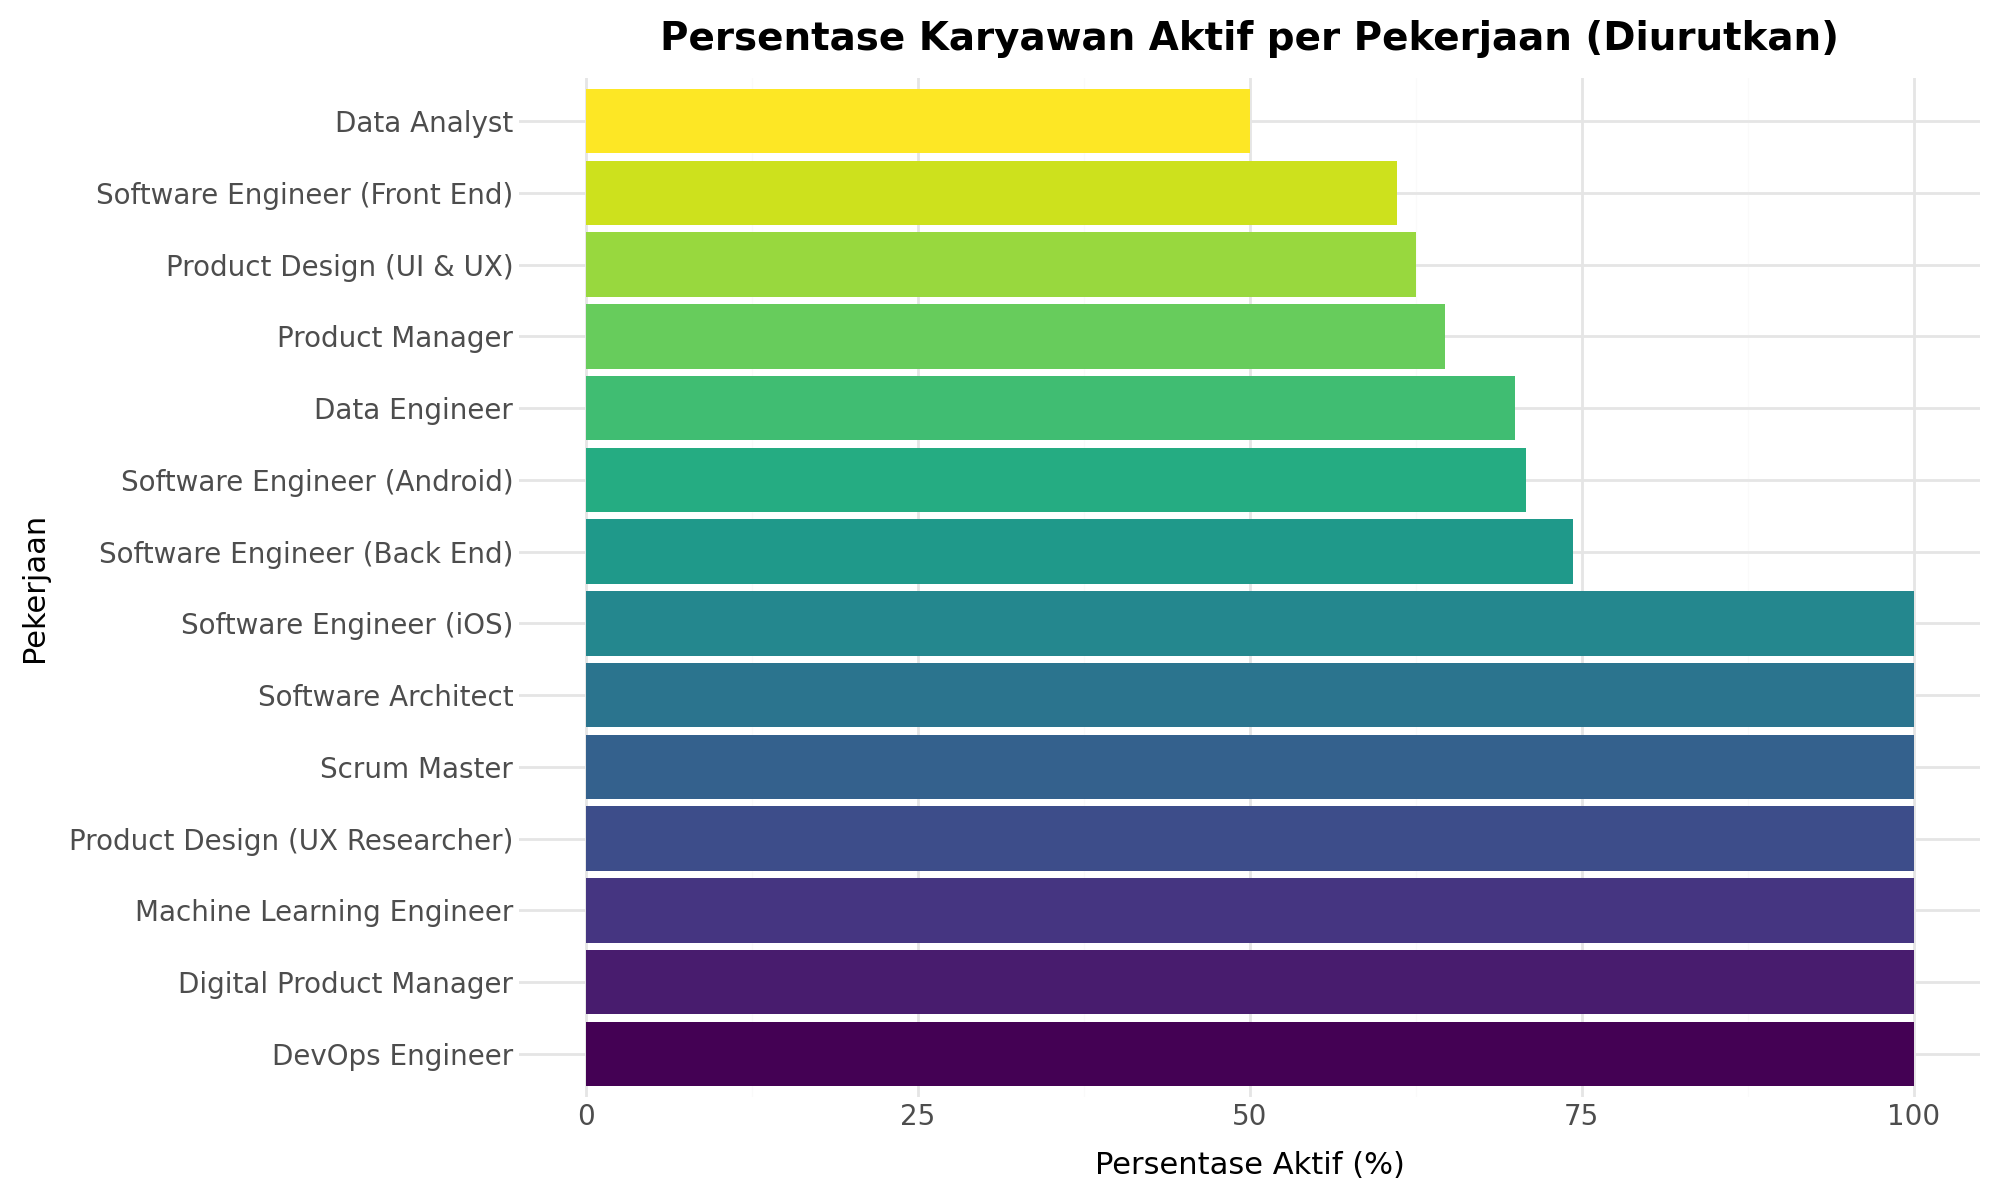

In [17]:
from plotnine import (
    ggplot, aes, geom_col, labs, theme_minimal, theme, element_text, coord_flip
)

plot_persen_aktif = (
    ggplot(df_sorted, aes(x='Pekerjaan', y='Persentase_Aktif (%)', fill='Pekerjaan')) +
    geom_col(show_legend=False) +
    labs(
        title='Persentase Karyawan Aktif per Pekerjaan (Diurutkan)',
        x='Pekerjaan',
        y='Persentase Aktif (%)'
    ) +
    theme_minimal() +
    theme(
        axis_text_y=element_text(size=10),
        axis_text_x=element_text(size=10),
        figure_size=(10, 6),
        plot_title=element_text(size=14, weight='bold')
    ) +
    coord_flip()
)

plot_persen_aktif


In [18]:
# LANGKAH 1: Cari pekerjaan dengan persentase aktif paling kecil
pekerjaan_terendah = df_perbandingan.sort_values("Persentase_Aktif (%)").iloc[0]["Pekerjaan"]

print(f"📌 Pekerjaan dengan persentase aktif terkecil (resign tertinggi): {pekerjaan_terendah}")

# LANGKAH 2: Ambil data karyawan resign untuk pekerjaan tersebut
df_resign = df[df["TanggalResign"] != "-"]
df_resign_pekerjaan = df_resign[df_resign["Pekerjaan"] == pekerjaan_terendah]

# LANGKAH 3: Hitung jumlah resign berdasarkan alasan
alasan_resign_terbanyak = df_resign_pekerjaan.groupby("AlasanResign")["EnterpriseID"].count().reset_index()
alasan_resign_terbanyak.columns = ["Alasan Resign", "Jumlah Resign"]
alasan_resign_terbanyak = alasan_resign_terbanyak.sort_values("Jumlah Resign", ascending=False)

# Tampilkan hasil
print("\n📊 Alasan Resign Terbanyak untuk Pekerjaan dengan Persentase Aktif Terkecil:")
alasan_resign_terbanyak


📌 Pekerjaan dengan persentase aktif terkecil (resign tertinggi): Data Analyst

📊 Alasan Resign Terbanyak untuk Pekerjaan dengan Persentase Aktif Terkecil:


Alasan Resign  Jumlah Resign
1      toxic_culture              6
0  internal_conflict              2

In [19]:
# Pastikan alasan resign yang kosong diisi 'masih_bekerja'
df["AlasanResign"] = df["AlasanResign"].fillna("masih_bekerja")

# Agregasi semua Data Analyst termasuk yang masih bekerja
df_2 = (
    df.query("Pekerjaan == 'Data Analyst'")
      .groupby(["JenjangKarir", "PerformancePegawai", "AlasanResign"])
      .count()["EnterpriseID"]
      .reset_index()
)

# Ubah nama kolom agar lebih rapi (opsional)
df_2.columns = ["Jenjang Karir", "Performa", "Alasan Resign", "Jumlah Karyawan"]

# Tampilkan hasil
df_2


Jenjang Karir       Performa      Alasan Resign  Jumlah Karyawan
0   Freshgraduate_program          Bagus      masih_bekerja                1
1   Freshgraduate_program          Bagus      toxic_culture                1
2   Freshgraduate_program          Biasa  internal_conflict                1
3   Freshgraduate_program          Biasa      masih_bekerja                1
4   Freshgraduate_program          Biasa      toxic_culture                1
5   Freshgraduate_program   Sangat_bagus  internal_conflict                1
6   Freshgraduate_program   Sangat_bagus      toxic_culture                3
7   Freshgraduate_program  Sangat_kurang      toxic_culture                1
8               Mid_level          Bagus      masih_bekerja                1
9               Mid_level         Kurang      masih_bekerja                1
10              Mid_level   Sangat_bagus      masih_bekerja                4

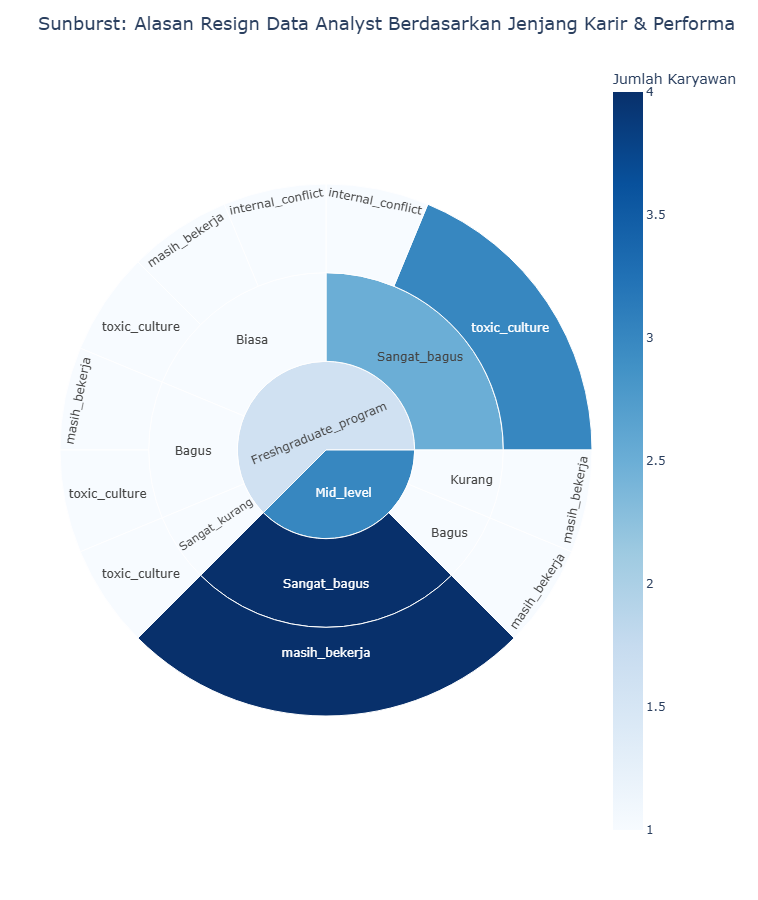

In [20]:
import plotly.express as px

fig = px.sunburst(
    df_2,
    path=["Jenjang Karir", "Performa", "Alasan Resign"],
    values="Jumlah Karyawan",
    color="Jumlah Karyawan",
    color_continuous_scale="Blues",
    title="Sunburst: Alasan Resign Data Analyst Berdasarkan Jenjang Karir & Performa"
)

# Perbesar ukuran plot
fig.update_layout(
    width=900,
    height=900,
    margin=dict(t=60, l=60, r=60, b=60),
    title_font_size=18
)

fig.show()


C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_7020\3138965207.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '14.29' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_7020\3138965207.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '28.57' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_7020\3138965207.py:42: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '14.29' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_7020\3138965207.py:42: FutureWarning: Setting an item 

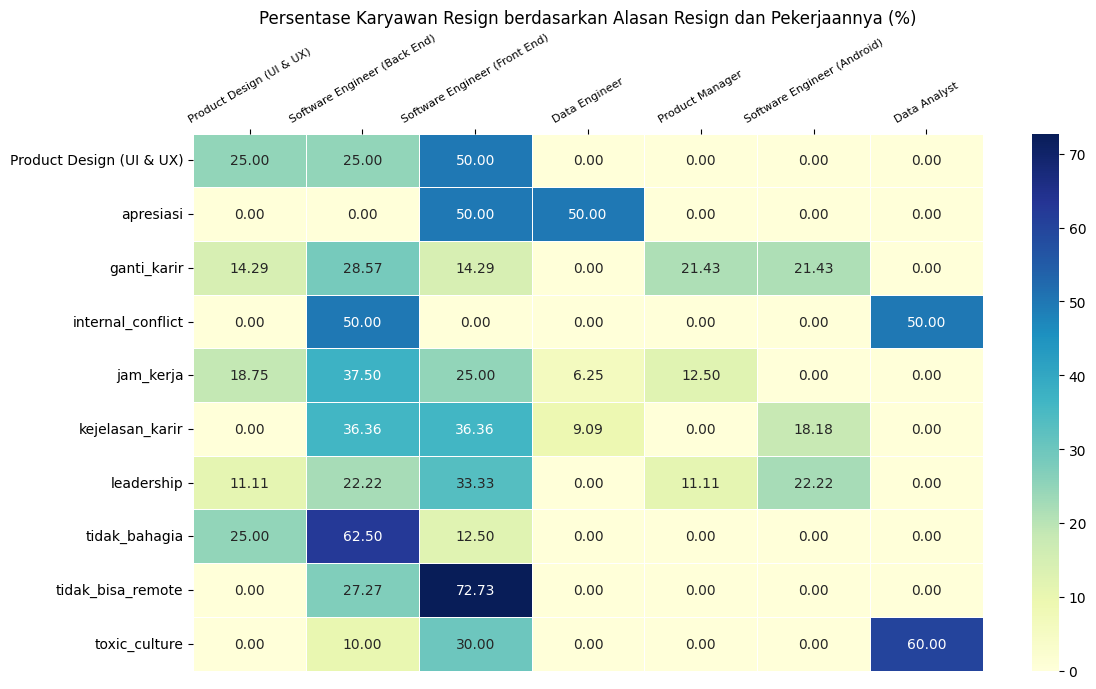

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Pastikan isResign 1 menandakan sudah resign
# Buat kolom isResign: 1 = sudah resign, 0 = masih bekerja
df["isResign"] = df["TanggalResign"].apply(lambda x: 0 if x == "-" else 1)

# Hitung jumlah resign per AlasanResign dan Pekerjaan
df_score = (
    df.query("isResign == 1")
      .groupby(["AlasanResign", "Pekerjaan"])["EnterpriseID"]
      .count()
      .reset_index()
)

# Siapkan matrix
review_matrix = []
pekerjaan_sort = df_score["Pekerjaan"].unique()

# Susun matrix berdasarkan AlasanResign
for alasan in df_score["AlasanResign"].unique():
    temp_df = df_score[df_score["AlasanResign"] == alasan] \
        .set_index("Pekerjaan")["EnterpriseID"] \
        .reindex(pekerjaan_sort).fillna(0)
    temp_vector = [int(x) for x in temp_df.reset_index()["EnterpriseID"]]
    review_matrix.append(temp_vector)

# Buat pivot dataframe
review_pivot = pd.DataFrame(
    review_matrix,
    columns=pekerjaan_sort,
    index=df_score["AlasanResign"].unique()
)

# Hitung total per baris (per alasan resign)
division_list = np.sum(review_pivot, axis=1).reset_index(drop=True).tolist()

# Ubah ke persentase per alasan (tiap baris 100%)
for idx, alasan in enumerate(review_pivot.index):
    review_pivot.loc[alasan] = round(100.0 * review_pivot.loc[alasan] / division_list[idx], 2)

# Buat heatmap
plt.figure(figsize=(12, 7))
ax = sns.heatmap(review_pivot, linewidths=0.5, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True)

# Styling
ax.xaxis.set_ticks_position('top')
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, fontsize=8)
ax.set_ylabel('')
ax.set_xlabel('')
ax.set_title("Persentase Karyawan Resign berdasarkan Alasan Resign dan Pekerjaannya (%)")

plt.tight_layout()
plt.show()


In [22]:
# Pastikan semua kolom yang dibutuhkan tidak kosong
df["Tahun_Hiring"] = df["Tahun_Hiring"].fillna(0).astype(int)
df["TanggalLahir"] = df["TanggalLahir"].fillna("1900-01-01")  # isi default aman
df["TanggalPenilaianKaryawan"] = df["TanggalPenilaianKaryawan"].fillna("1900-01-01")
df["Tahun_Resign"] = df["Tahun_Resign"].fillna("-")

# Bersihkan Tahun Resign
df["Tahun_Resign_cleaned"] = df["Tahun_Resign"].apply(
    lambda x: 0 if (x == "-" or pd.isna(x)) else int(x)
)

# Hitung lama bekerja
df["lama_bekerja"] = df["Tahun_Resign_cleaned"] - df["Tahun_Hiring"]
df["lama_bekerja"] = df["lama_bekerja"].apply(lambda x: 0 if x < 0 else x)

# Hitung usia saat di-hire
df["usia_hired"] = df["Tahun_Hiring"] - df["TanggalLahir"].apply(lambda x: int(str(x)[:4]))

# Hitung jarak penilaian
df["jarak_penilaian_tahun"] = df["TanggalPenilaianKaryawan"].apply(lambda x: int(str(x)[:4])) - df["Tahun_Hiring"]

# Tampilkan statistik
df[["usia_hired", "lama_bekerja", "jarak_penilaian_tahun"]].describe()


usia_hired  lama_bekerja  jarak_penilaian_tahun
count  287.000000    287.000000             287.000000
mean    34.080139      1.254355               5.933798
std      8.854922      2.353715               2.339791
min     19.000000      0.000000               1.000000
25%     28.000000      0.000000               4.000000
50%     32.000000      0.000000               6.000000
75%     39.000000      1.000000               7.000000
max     63.000000      9.000000              14.000000

In [23]:
df.columns

Index(['Username', 'EnterpriseID', 'StatusPernikahan', 'JenisKelamin',
       'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir', 'PerformancePegawai',
       'AsalDaerah', 'HiringPlatform', 'SkorSurveyEngagement',
       'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek',
       'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran', 'NomorHP',
       'Email', 'TingkatPendidikan', 'AlasanResign', 'TanggalLahir',
       'TanggalHiring', 'TanggalPenilaianKaryawan', 'TanggalResign',
       'Tahun_Hiring', 'Tahun_Resign', 'isResign', 'Tahun_Resign_cleaned',
       'lama_bekerja', 'usia_hired', 'jarak_penilaian_tahun'],
      dtype='object')

In [24]:
# Daftar kolom yang tidak digunakan untuk machine learning karena mengandung informasi sensitif atau tidak relevan
kolom_dibuang = [
    "Username", "JenisKelamin", "NomorHP", "Email", "AlasanResign",
    "TanggalHiring", "TanggalLahir", "TanggalPenilaianKaryawan",
    "Tahun_Resign", "TanggalResign", "Tahun_Hiring"
]

# Buat salinan data tanpa kolom-kolom tersebut
df_model = df.drop(columns=kolom_dibuang)

# Lihat 5 baris pertama dari data hasil
df_model.head()


EnterpriseID StatusPernikahan StatusKepegawaian  \
0        111065    Belum_menikah         Outsource   
1        106080    Belum_menikah          FullTime   
2        106452          Menikah          FullTime   
3        106325    Belum_menikah         Outsource   
4        111171    Belum_menikah          FullTime   

                       Pekerjaan           JenjangKarir PerformancePegawai  \
0   Software Engineer (Back End)  Freshgraduate_program       Sangat_bagus   
1                   Data Analyst  Freshgraduate_program      Sangat_kurang   
2  Software Engineer (Front End)  Freshgraduate_program              Bagus   
3  Software Engineer (Front End)  Freshgraduate_program              Bagus   
4                Product Manager  Freshgraduate_program              Bagus   

      AsalDaerah     HiringPlatform  SkorSurveyEngagement  \
0  Jakarta Timur  Employee_Referral                     4   
1  Jakarta Utara            Website                     4   
2  Jakarta Timur             Indeed                     4   
3  Jakarta Pusat           LinkedIn                     3   
4  Jakarta Timur           LinkedIn                     3   

   SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
0                  4.0                        0.0   
1                  4.0                        4.0   
2                  3.0                        0.0   
3                  3.0                        0.0   
4                  3.0                        0.0   

   JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran TingkatPendidikan  \
0                                 0.0                   9.0          Magister   
1                                 0.0                   3.0           Sarjana   
2                                 0.0                  11.0          Magister   
3                                 4.0                   6.0           Sarjana   
4                                 0.0                  11.0           Sarjana   

   isResign  Tahun_Resign_cleaned  lama_bekerja  usia_hired  \
0         0                     0             0          39   
1         1                  2018             4          30   
2         1                  2014             3          37   
3         0                     0             0          35   
4         1                  2018             5          39   

   jarak_penilaian_tahun  
0                      5  
1                      6  
2                      5  
3                      6  
4                      7

In [25]:
#cek missing value
df.isna().sum()


Username                              0
EnterpriseID                          0
StatusPernikahan                      0
JenisKelamin                          0
StatusKepegawaian                     0
Pekerjaan                             0
JenjangKarir                          0
PerformancePegawai                    0
AsalDaerah                            0
HiringPlatform                        0
SkorSurveyEngagement                  0
SkorKepuasanPegawai                   0
JumlahKeikutsertaanProjek             0
JumlahKeterlambatanSebulanTerakhir    0
JumlahKetidakhadiran                  0
NomorHP                               0
Email                                 0
TingkatPendidikan                     0
AlasanResign                          0
TanggalLahir                          0
TanggalHiring                         0
TanggalPenilaianKaryawan              0
TanggalResign                         0
Tahun_Hiring                          0
Tahun_Resign                          0


In [26]:
missing_percent = (df.isna().sum() / len(df)) * 100
print(missing_percent)


Username                              0.0
EnterpriseID                          0.0
StatusPernikahan                      0.0
JenisKelamin                          0.0
StatusKepegawaian                     0.0
Pekerjaan                             0.0
JenjangKarir                          0.0
PerformancePegawai                    0.0
AsalDaerah                            0.0
HiringPlatform                        0.0
SkorSurveyEngagement                  0.0
SkorKepuasanPegawai                   0.0
JumlahKeikutsertaanProjek             0.0
JumlahKeterlambatanSebulanTerakhir    0.0
JumlahKetidakhadiran                  0.0
NomorHP                               0.0
Email                                 0.0
TingkatPendidikan                     0.0
AlasanResign                          0.0
TanggalLahir                          0.0
TanggalHiring                         0.0
TanggalPenilaianKaryawan              0.0
TanggalResign                         0.0
Tahun_Hiring                      

In [27]:
missing_df = pd.DataFrame({
    "Missing Count": df.isna().sum(),
    "Missing Percent": round((df.isna().sum() / len(df)) * 100, 2)
})
missing_df = missing_df[missing_df["Missing Count"] > 0]  # tampilkan hanya yang ada missing
missing_df


Empty DataFrame
Columns: [Missing Count, Missing Percent]
Index: []

In [28]:
#cek duplikat
df_model.duplicated().sum()

0

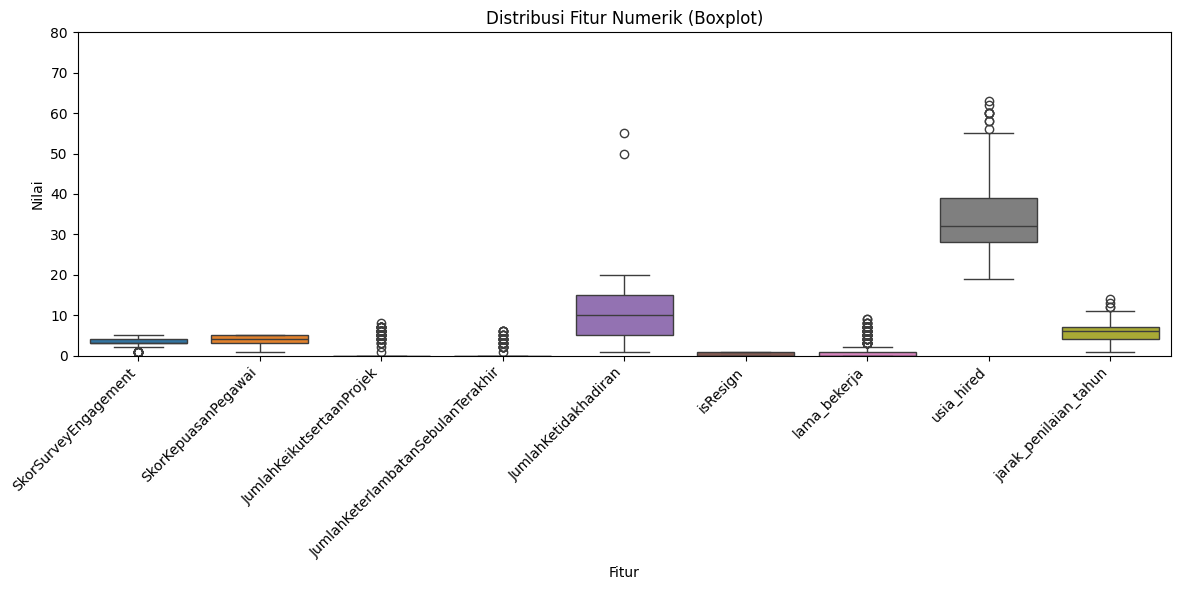

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Hapus kolom 'EnterpriseID' jika masih ada
df_plot = df_model.drop(columns=["EnterpriseID", "Tahun_Resign_cleaned"], errors='ignore')

# Ambil hanya kolom numerik
numerik_cols = df_plot.select_dtypes(include=["int64", "float64"]).columns

# Buat plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_plot[numerik_cols], orient="v")

# Styling
plt.title("Distribusi Fitur Numerik (Boxplot)")
plt.xlabel("Fitur")
plt.ylabel("Nilai")
plt.xticks(rotation=45, ha='right')

# Atur batas sumbu Y
plt.ylim(0, 80)

plt.tight_layout()
plt.show()


In [30]:
df_plot.describe()

SkorSurveyEngagement  SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
count            287.000000           287.000000                 287.000000   
mean               3.101045             3.888502                   1.167247   
std                0.836388             0.913060                   2.285537   
min                1.000000             1.000000                   0.000000   
25%                3.000000             3.000000                   0.000000   
50%                3.000000             4.000000                   0.000000   
75%                4.000000             5.000000                   0.000000   
max                5.000000             5.000000                   8.000000   

       JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran    isResign  \
count                          287.000000            287.000000  287.000000   
mean                             0.411150             10.439024    0.310105   
std                              1.273018              6.829769    0.463344   
min                              0.000000              1.000000    0.000000   
25%                              0.000000              5.000000    0.000000   
50%                              0.000000             10.000000    0.000000   
75%                              0.000000             15.000000    1.000000   
max                              6.000000             55.000000    1.000000   

       lama_bekerja  usia_hired  jarak_penilaian_tahun  
count    287.000000  287.000000             287.000000  
mean       1.254355   34.080139               5.933798  
std        2.353715    8.854922               2.339791  
min        0.000000   19.000000               1.000000  
25%        0.000000   28.000000               4.000000  
50%        0.000000   32.000000               6.000000  
75%        1.000000   39.000000               7.000000  
max        9.000000   63.000000              14.000000

In [31]:
import numpy as np
import pandas as pd

def remove_outliers(df, keep=[], imputation="median", verbose=True):
    df_clean = df.copy()
    
    # Ambil kolom numerik
    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns.tolist()
    
    # Kecualikan kolom yang ingin disimpan apa pun nilainya
    numeric_cols = [col for col in numeric_cols if col not in keep]
    
    for col in numeric_cols:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        
        # Tandai outlier
        outlier_mask = (df_clean[col] < lower) | (df_clean[col] > upper)
        n_outliers = outlier_mask.sum()
        
        # Cetak info outlier (jika verbose=True)
        if verbose and n_outliers > 0:
            print(f"{col}: {n_outliers} outliers removed.")
        
        # Ganti outlier jadi NaN
        df_clean.loc[outlier_mask, col] = np.nan

        # Imputasi
        if imputation == "median":
            median_val = df_clean[col].median()
            df_clean[col].fillna(median_val, inplace=True)
        elif imputation == "mean":
            mean_val = df_clean[col].mean()
            df_clean[col].fillna(mean_val, inplace=True)

    return df_clean


In [32]:
df_clean = remove_outliers(
    df_model,
    keep=[
        "EnterpriseID",
        "SkorSurveyEngagement",
        "JumlahKeikutsertaanProjek",
        "keikutsertaanproject_boolean",
        "isResign",
        "lama_bekerja",
        "JumlahKeterlambatanSebulanTerakhir"
    ],
    imputation="median",
    verbose=True
)


JumlahKetidakhadiran: 2 outliers removed.
usia_hired: 9 outliers removed.
jarak_penilaian_tahun: 4 outliers removed.


C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_7020\2528909041.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


C:\Users\Zarah Sabrina\AppData\Local\Temp\ipykernel_7020\2528909041.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(va

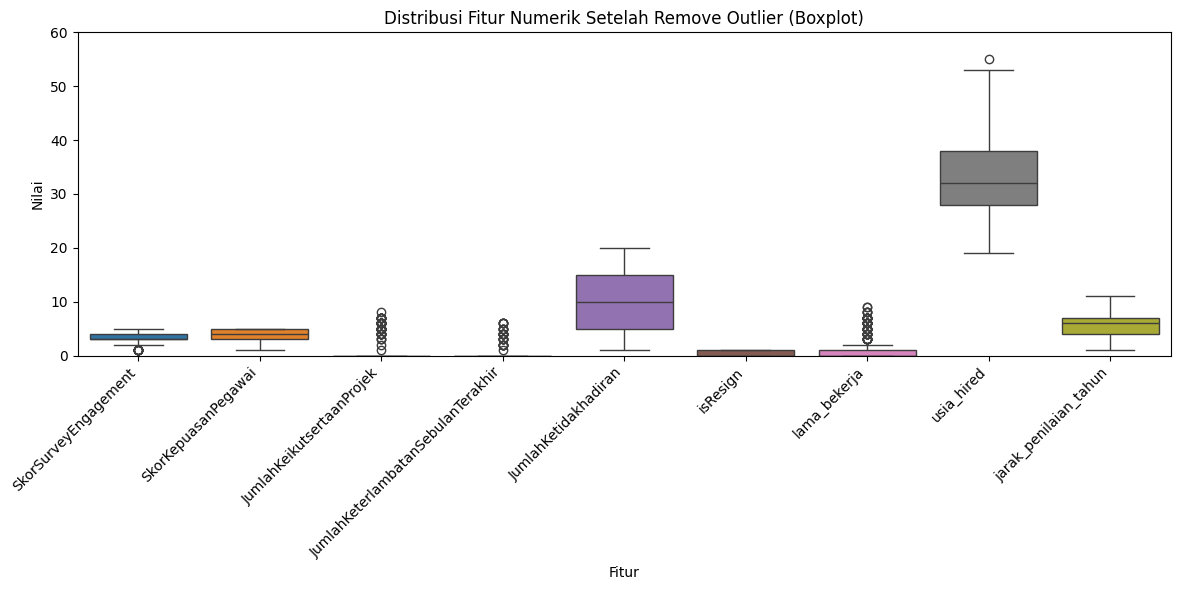

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Buang kolom yang tidak relevan jika ada
df_plot = df_clean.drop(columns=["EnterpriseID", "Tahun_Resign_cleaned"], errors='ignore')

# 2. Ambil kolom numerik saja
numerik_cols = df_plot.select_dtypes(include=["int64", "float64"]).columns

# 3. Buat figure dan ukuran gambar
plt.figure(figsize=(12, 6))

# 4. Buat boxplot vertikal (X = fitur, Y = nilai)
sns.boxplot(data=df_plot[numerik_cols], orient="v")

# 5. Styling tampilan
plt.title("Distribusi Fitur Numerik Setelah Remove Outlier (Boxplot)")
plt.xlabel("Fitur")
plt.ylabel("Nilai")
plt.xticks(rotation=45, ha='right')  # rotasi label X agar tidak menumpuk
plt.ylim(0, 60)  # batasi rentang nilai sumbu Y

# 6. Tampilkan plot
plt.tight_layout()
plt.show()


In [34]:
df_plot.columns


Index(['StatusPernikahan', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir',
       'PerformancePegawai', 'AsalDaerah', 'HiringPlatform',
       'SkorSurveyEngagement', 'SkorKepuasanPegawai',
       'JumlahKeikutsertaanProjek', 'JumlahKeterlambatanSebulanTerakhir',
       'JumlahKetidakhadiran', 'TingkatPendidikan', 'isResign', 'lama_bekerja',
       'usia_hired', 'jarak_penilaian_tahun'],
      dtype='object')

In [35]:
# 🎯 Feature Encoding

# 🔧 Normalisasi dan pembersihan nilai
df_plot["StatusPernikahan"] = df_plot["StatusPernikahan"].replace("-", "Lainnya")
df_plot["AsalDaerah"] = df_plot["AsalDaerah"].str.replace(" ", "_")

# 🎓 Encode Tingkat Pendidikan
pendidikan_map = {"Sarjana": 1, "Magister": 2, "Doktor": 3}
df_plot["TingkatPendidikan"] = df_plot["TingkatPendidikan"].map(pendidikan_map)

# 💼 Encode Jenjang Karir
karir_map = {"Freshgraduate_program": 1, "Mid_level": 2, "Senior_level": 3}
df_plot["JenjangKarir"] = df_plot["JenjangKarir"].map(karir_map)

# ⭐ Encode Performa Pegawai
performa_map = {
    "Sangat_kurang": 1,
    "Kurang": 2,
    "Biasa": 3,
    "Bagus": 4,
    "Sangat_bagus": 5
}
df_plot["PerformancePegawai"] = df_plot["PerformancePegawai"].map(performa_map)

# 👨‍💻 Kelompokkan Pekerjaan ke Divisi
div_engineering = [
    'Software Engineer (Back End)', 'Software Engineer (Front End)',
    'Software Engineer (Android)', 'Software Engineer (iOS)',
    'DevOps Engineer', 'Software Architect', 'Machine Learning Engineer'
]
div_data = ['Data Analyst', 'Data Engineer']
div_product = [
    'Product Manager', 'Product Design (UX Researcher)',
    'Product Design (UI & UX)', 'Digital Product Manager', 'Scrum Master'
]

df_plot["Pekerjaan"] = df_plot["Pekerjaan"].apply(
    lambda x: "engineering_division" if x in div_engineering else
              "data_division" if x in div_data else
              "product_division"
)

# 📊 Frequency Encoding untuk HiringPlatform
platform_freq = df_plot["HiringPlatform"].value_counts(normalize=True)
df_plot["HiringPlatform_Encode"] = df_plot["HiringPlatform"].map(platform_freq)

# Hapus kolom HiringPlatform asli
df_plot.drop(columns=["HiringPlatform"], inplace=True)


In [36]:
# Pilih kolom kategorikal dari df_model (non-numerik)
df_categorical = df_plot.select_dtypes(exclude=["int64", "float64"])

# Pilih kolom numerikal dari df_model
df_numerical = df_plot.select_dtypes(include=["int64", "float64"])


In [37]:
df_plot.columns

Index(['StatusPernikahan', 'StatusKepegawaian', 'Pekerjaan', 'JenjangKarir',
       'PerformancePegawai', 'AsalDaerah', 'SkorSurveyEngagement',
       'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek',
       'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran',
       'TingkatPendidikan', 'isResign', 'lama_bekerja', 'usia_hired',
       'jarak_penilaian_tahun', 'HiringPlatform_Encode'],
      dtype='object')

In [38]:
# 🚀 Identifikasi Strategi Encoding untuk Fitur Kategorikal

# Siapkan tiga list kosong untuk klasifikasi strategi encoding
fitur_label_encoding = []
fitur_onehot_encoding = []
fitur_frequency_encoding = []

# Lakukan iterasi untuk setiap kolom kategorikal dalam df_plot
for kolom in df_plot.select_dtypes(exclude=["int64", "float64"]).columns:
    nilai_unik = df_plot[kolom].unique().tolist()
    jumlah_unik = len(nilai_unik)
    print(nilai_unik)

    # Tentukan metode encoding berdasarkan jumlah nilai unik
    if jumlah_unik == 2:
        print(f"{kolom} termasuk variabel dikotomis ({jumlah_unik} kategori). Metode: Label Encoding")
        fitur_label_encoding.append(kolom)
    elif 2 < jumlah_unik <= 6:
        print(f"{kolom} memiliki {jumlah_unik} kategori. Metode: One-hot Encoding")
        fitur_onehot_encoding.append(kolom)
    elif jumlah_unik > 6:
        print(f"{kolom} memiliki {jumlah_unik} kategori. Metode: Frequency Encoding")
        fitur_frequency_encoding.append(kolom)
    else:
        print(f"{kolom} tidak dikenali dalam klasifikasi standar (jumlah kategori: {jumlah_unik}). Akan dilewati.")
    
    print("")  # Tambahkan baris kosong agar output lebih mudah dibaca


['Belum_menikah', 'Menikah', 'Bercerai', 'Lainnya']
StatusPernikahan memiliki 4 kategori. Metode: One-hot Encoding

['Outsource', 'FullTime', 'Internship']
StatusKepegawaian memiliki 3 kategori. Metode: One-hot Encoding

['engineering_division', 'data_division', 'product_division']
Pekerjaan memiliki 3 kategori. Metode: One-hot Encoding

['Jakarta_Timur', 'Jakarta_Utara', 'Jakarta_Pusat', 'Jakarta_Selatan', 'Jakarta_Barat']
AsalDaerah memiliki 5 kategori. Metode: One-hot Encoding



In [39]:
# Lakukan One-Hot Encoding pada fitur kategorikal dari df_model
df_encoded_categorical = pd.get_dummies(
    df_plot.select_dtypes(exclude=["int64", "float64"])
)

# Lihat 5 baris pertama hasil encoding
df_encoded_categorical.head()


StatusPernikahan_Belum_menikah  StatusPernikahan_Bercerai  \
0                            True                      False   
1                            True                      False   
2                           False                      False   
3                            True                      False   
4                            True                      False   

   StatusPernikahan_Lainnya  StatusPernikahan_Menikah  \
0                     False                     False   
1                     False                     False   
2                     False                      True   
3                     False                     False   
4                     False                     False   

   StatusKepegawaian_FullTime  StatusKepegawaian_Internship  \
0                       False                         False   
1                        True                         False   
2                        True                         False   
3                       False                         False   
4                        True                         False   

   StatusKepegawaian_Outsource  Pekerjaan_data_division  \
0                         True                    False   
1                        False                     True   
2                        False                    False   
3                         True                    False   
4                        False                    False   

   Pekerjaan_engineering_division  Pekerjaan_product_division  \
0                            True                       False   
1                           False                       False   
2                            True                       False   
3                            True                       False   
4                           False                        True   

   AsalDaerah_Jakarta_Barat  AsalDaerah_Jakarta_Pusat  \
0                     False                     False   
1                     False                     False   
2                     False                     False   
3                     False                      True   
4                     False                     False   

   AsalDaerah_Jakarta_Selatan  AsalDaerah_Jakarta_Timur  \
0                       False                      True   
1                       False                     False   
2                       False                      True   
3                       False                     False   
4                       False                      True   

   AsalDaerah_Jakarta_Utara  
0                     False  
1                      True  
2                     False  
3                     False  
4                     False

In [40]:
# Gabungkan data numerik dan data kategorikal hasil encoding
df_plot = pd.concat([df_numerical, df_encoded_categorical], axis=1)

# Ganti nama kolom target menjadi 'y' untuk keperluan pemodelan
df_plot = df_plot.rename(columns={"isResign": "y"})

# Tampilkan 5 baris pertama
df_plot.head()


JenjangKarir  PerformancePegawai  SkorSurveyEngagement  \
0             1                   5                     4   
1             1                   1                     4   
2             1                   4                     4   
3             1                   4                     3   
4             1                   4                     3   

   SkorKepuasanPegawai  JumlahKeikutsertaanProjek  \
0                  4.0                        0.0   
1                  4.0                        4.0   
2                  3.0                        0.0   
3                  3.0                        0.0   
4                  3.0                        0.0   

   JumlahKeterlambatanSebulanTerakhir  JumlahKetidakhadiran  \
0                                 0.0                   9.0   
1                                 0.0                   3.0   
2                                 0.0                  11.0   
3                                 4.0                   6.0   
4                                 0.0                  11.0   

   TingkatPendidikan  y  lama_bekerja  ...  StatusKepegawaian_Internship  \
0                  2  0             0  ...                         False   
1                  1  1             4  ...                         False   
2                  2  1             3  ...                         False   
3                  1  0             0  ...                         False   
4                  1  1             5  ...                         False   

   StatusKepegawaian_Outsource  Pekerjaan_data_division  \
0                         True                    False   
1                        False                     True   
2                        False                    False   
3                         True                    False   
4                        False                    False   

   Pekerjaan_engineering_division  Pekerjaan_product_division  \
0                            True                       False   
1                           False                       False   
2                            True                       False   
3                            True                       False   
4                           False                        True   

   AsalDaerah_Jakarta_Barat  AsalDaerah_Jakarta_Pusat  \
0                     False                     False   
1                     False                     False   
2                     False                     False   
3                     False                      True   
4                     False                     False   

   AsalDaerah_Jakarta_Selatan  AsalDaerah_Jakarta_Timur  \
0                       False                      True   
1                       False                     False   
2                       False                      True   
3                       False                     False   
4                       False                      True   

   AsalDaerah_Jakarta_Utara  
0                     False  
1                      True  
2                     False  
3                     False  
4                     False  

[5 rows x 28 columns]

In [41]:
print(df_plot.columns)


Index(['JenjangKarir', 'PerformancePegawai', 'SkorSurveyEngagement',
       'SkorKepuasanPegawai', 'JumlahKeikutsertaanProjek',
       'JumlahKeterlambatanSebulanTerakhir', 'JumlahKetidakhadiran',
       'TingkatPendidikan', 'y', 'lama_bekerja', 'usia_hired',
       'jarak_penilaian_tahun', 'HiringPlatform_Encode',
       'StatusPernikahan_Belum_menikah', 'StatusPernikahan_Bercerai',
       'StatusPernikahan_Lainnya', 'StatusPernikahan_Menikah',
       'StatusKepegawaian_FullTime', 'StatusKepegawaian_Internship',
       'StatusKepegawaian_Outsource', 'Pekerjaan_data_division',
       'Pekerjaan_engineering_division', 'Pekerjaan_product_division',
       'AsalDaerah_Jakarta_Barat', 'AsalDaerah_Jakarta_Pusat',
       'AsalDaerah_Jakarta_Selatan', 'AsalDaerah_Jakarta_Timur',
       'AsalDaerah_Jakarta_Utara'],
      dtype='object')


In [42]:
#Threshold Imbalancing
# Hitung persentase distribusi target y (0 = aktif, 1 = resign)
imbalanced_ratio = 100.0 * df_plot["y"].value_counts(normalize=True)

# Tampilkan hasil
print("🔎 Distribusi Label y (dalam %):")
print(imbalanced_ratio)



🔎 Distribusi Label y (dalam %):
y
0    68.989547
1    31.010453
Name: proportion, dtype: float64


In [43]:
#split train test
from sklearn.model_selection import train_test_split

# Pisahkan fitur (X) dan target (y)
X = df_plot.drop(columns=["y"])  # Semua fitur
y = df_plot["y"].tolist()        # Target sebagai list

# Bagi data menjadi data latih (80%) dan data uji (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.20,   # 20% untuk testing
    random_state=42,  # Untuk reprodusibilitas
    stratify=y        # Menjaga proporsi y tetap seimbang
)


In [44]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek

from sklearn.model_selection import RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_validate
from xgboost import XGBClassifier

tl = TomekLinks(sampling_strategy="auto")
rus = RandomUnderSampler(random_state=123)
enn = EditedNearestNeighbours()
senn = SMOTEENN(random_state=123)
stl = SMOTETomek(random_state=123)

In [45]:
import sklearn
print("✅ scikit-learn:", sklearn.__version__)

✅ scikit-learn: 1.3.2


In [46]:
import imblearn
print("imbalanced-learn:", imblearn.__version__)

imbalanced-learn: 0.11.0


In [47]:
from sklearn.model_selection import RepeatedStratifiedKFold, cross_validate
from imblearn.pipeline import Pipeline
from xgboost import XGBClassifier
from IPython.display import clear_output
import time
import numpy as np
import pandas as pd

# Daftar teknik penyeimbangan data
daftar_teknik_resampling = [tl, rus, enn, senn, stl]

# List penampung hasil evaluasi
nama_teknik = []
akurasi_list = []
presisi_list = []
recall_list = []
auc_list = []
durasi_latih = []

# Evaluasi tiap teknik resampling
for teknik in daftar_teknik_resampling:
    print(f"🔄 Evaluasi dengan teknik: {teknik.__class__.__name__}")
    mulai = time.time()

    # Inisialisasi model
    model = XGBClassifier(verbosity=0, use_label_encoder=False, random_state=123)

    # Buat pipeline: teknik resampling + model
    alur_model = Pipeline(steps=[
        ("resampling", teknik),
        ("classifier", model)
    ])

    # Skema validasi silang berulang
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    metrik = ["accuracy", "precision_macro", "recall_macro", "roc_auc"]

    # Cross-validation
    hasil = cross_validate(
        alur_model,
        X_train,
        y_train,
        scoring=metrik,
        cv=cv,
        n_jobs=1,  # ✅ ganti jadi 1 untuk menghindari pickling error
        error_score='raise'
    )

    # Simpan hasil rata-rata
    nama_teknik.append(teknik.__class__.__name__)
    akurasi_list.append(np.mean(hasil["test_accuracy"]))
    presisi_list.append(np.mean(hasil["test_precision_macro"]))
    recall_list.append(np.mean(hasil["test_recall_macro"]))
    auc_list.append(np.mean(hasil["test_roc_auc"]))
    durasi_latih.append(time.strftime('%H:%M:%S', time.gmtime(time.time() - mulai)))

# Bersihkan output loading
clear_output()

# Kompilasi hasil ke dalam DataFrame
tabel_hasil = pd.DataFrame({
    "Teknik Resampling": nama_teknik,
    "Akurasi": akurasi_list,
    "Presisi": presisi_list,
    "Recall": recall_list,
    "AUC": auc_list,
    "Waktu Latih": durasi_latih
})

# Urutkan berdasarkan performa AUC
tabel_hasil = tabel_hasil.sort_values("AUC", ascending=False)
tabel_hasil


Teknik Resampling   Akurasi   Presisi    Recall       AUC Waktu Latih
0               TomekLinks  0.967984  0.977004  0.949851  0.970496    00:00:19
2  EditedNearestNeighbours  0.949078  0.949371  0.937510  0.969425    00:00:19
1       RandomUnderSampler  0.957839  0.960559  0.942560  0.966329    00:00:18
4               SMOTETomek  0.963636  0.969396  0.948065  0.963274    00:00:20
3                 SMOTEENN  0.960738  0.964981  0.944573  0.943879    00:00:17

In [48]:
#Modeling
# Algoritma Klasifikasi dari berbagai library
from sklearn.linear_model import LogisticRegression                      # Regresi Logistik
from sklearn.tree import DecisionTreeClassifier                         # Pohon Keputusan
from sklearn.svm import SVC                                             # Support Vector Machine
from sklearn.ensemble import (RandomForestClassifier,                   # Random Forest
                              BaggingClassifier,                        # Bagging
                              GradientBoostingClassifier,               # Gradient Boosting
                              AdaBoostClassifier)                       # AdaBoost
from sklearn.naive_bayes import GaussianNB                              # Naive Bayes
from sklearn.neighbors import KNeighborsClassifier                      # K-Nearest Neighbors
from sklearn.neural_network import MLPClassifier                        # Multi-layer Perceptron
from xgboost import XGBClassifier                                       # Extreme Gradient Boosting (XGBoost)
from lightgbm import LGBMClassifier                                     # Light Gradient Boosting (LightGBM)
from catboost import CatBoostClassifier                                 # CatBoost

# Import metrik evaluasi model klasifikasi
from sklearn.metrics import (
    accuracy_score,       # Akurasi
    roc_auc_score,        # Area Under ROC Curve
    precision_score,      # Presisi
    recall_score,         # Recall
    f1_score,             # F1 Score
    log_loss,             # Log Loss
    confusion_matrix,     # Matriks Kebingungan
    classification_report # Laporan Evaluasi Klasifikasi Lengkap
)


In [49]:
# Inisialisasi berbagai algoritma klasifikasi
model_nb = GaussianNB()  # Naive Bayes
model_svc = SVC(random_state=0)  # Support Vector Classifier
model_rf = RandomForestClassifier(random_state=0)  # Random Forest
model_logreg = LogisticRegression()  # Regresi Logistik
model_dt = DecisionTreeClassifier(random_state=0)  # Decision Tree
model_bagging = BaggingClassifier(estimator=model_dt, random_state=0)  # Bagging dengan Decision Tree
model_gb = GradientBoostingClassifier(random_state=0)  # Gradient Boosting
model_ada = AdaBoostClassifier(estimator=model_dt, random_state=0)  # AdaBoost
model_knn = KNeighborsClassifier()  # K-Nearest Neighbors
model_mlp = MLPClassifier()  # Neural Network (MLP)
model_xgb = XGBClassifier(random_state=0, use_label_encoder=False, verbosity=0)  # XGBoost
model_lgbm = LGBMClassifier(random_state=0)  # LightGBM
model_cat = CatBoostClassifier(random_state=0, verbose=0)  # CatBoost

# Simpan semua model dalam satu list
list_model_klasifikasi = [
    model_nb, model_svc, model_rf, model_logreg, model_dt,
    model_bagging, model_gb, model_ada, model_knn,
    model_mlp, model_xgb, model_lgbm, model_cat
]


In [50]:
# ==================== PERINGATAN & IMPORT ====================
import warnings
from sklearn.exceptions import ConvergenceWarning

# Sembunyikan peringatan yang tidak penting
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=ConvergenceWarning)


import time
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_validate, RepeatedStratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import TomekLinks

# ==================== INISIALISASI HASIL ====================
nama_model = []
nilai_akurasi = []
nilai_presisi = []
nilai_recall = []
nilai_auc = []
durasi_training = []

# ==================== EVALUASI SETIAP MODEL ====================
for model in list_model_klasifikasi:
    print(f"🔍 Sedang memproses: {model.__class__.__name__}")
    
    mulai = time.time()

    # Penyeimbangan data
    sampler = TomekLinks(sampling_strategy="auto")

    # Pipeline: under-sampling + klasifikasi
    pipeline = Pipeline(steps=[
        ("sampling", sampler),
        ("model", model)
    ])

    # Skema validasi
    cv_scheme = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    metrik = ["accuracy", "precision_macro", "recall_macro", "roc_auc"]

    # Evaluasi model
    hasil = cross_validate(
        pipeline,
        X_train,
        y_train,
        scoring=metrik,
        cv=cv_scheme,
        n_jobs=1,  # penting untuk mencegah error pickling
        error_score='raise'
    )

    # Simpan hasil
    nama_model.append(model.__class__.__name__)
    nilai_akurasi.append(np.mean(hasil["test_accuracy"]))
    nilai_presisi.append(np.mean(hasil["test_precision_macro"]))
    nilai_recall.append(np.mean(hasil["test_recall_macro"]))
    nilai_auc.append(np.mean(hasil["test_roc_auc"]))

    selesai = time.time()
    durasi_training.append(time.strftime('%H:%M:%S', time.gmtime(selesai - mulai)))

# ==================== HASIL EVALUASI AKHIR ====================
df_evaluasi_model = pd.DataFrame({
    "Model": nama_model,
    "Accuracy": nilai_akurasi,
    "Precision": nilai_presisi,
    "Recall": nilai_recall,
    "AUC": nilai_auc,
    "Training_Time": durasi_training
})

# Urutkan dari AUC tertinggi
df_evaluasi_model = df_evaluasi_model.sort_values("AUC", ascending=False)
df_evaluasi_model


🔍 Sedang memproses: GaussianNB
🔍 Sedang memproses: SVC
🔍 Sedang memproses: RandomForestClassifier
🔍 Sedang memproses: LogisticRegression
🔍 Sedang memproses: DecisionTreeClassifier
🔍 Sedang memproses: BaggingClassifier
🔍 Sedang memproses: GradientBoostingClassifier
🔍 Sedang memproses: AdaBoostClassifier
🔍 Sedang memproses: KNeighborsClassifier
🔍 Sedang memproses: MLPClassifier
🔍 Sedang memproses: XGBClassifier
🔍 Sedang memproses: LGBMClassifier
[LightGBM] [Info] Number of positive: 64, number of negative: 132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001523 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 147
[LightGBM] [Info] Number of data points in the train set: 196, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.326531 -> initscore=-0.723919
[LightGBM] [Info] Start training from score -0.723919
[L

Model  Accuracy  Precision    Recall       AUC  \
12          CatBoostClassifier  0.969433   0.979446  0.950893  0.971984   
10               XGBClassifier  0.967984   0.977004  0.949851  0.970496   
5            BaggingClassifier  0.965020   0.970931  0.949038  0.966558   
11              LGBMClassifier  0.957773   0.960455  0.942490  0.966448   
6   GradientBoostingClassifier  0.956324   0.957653  0.941448  0.960099   
2       RandomForestClassifier  0.969433   0.979446  0.950893  0.956448   
1                          SVC  0.873452   0.924504  0.797024  0.948294   
3           LogisticRegression  0.941831   0.958294  0.910268  0.942520   
0                   GaussianNB  0.969433   0.979446  0.950893  0.942163   
7           AdaBoostClassifier  0.937418   0.934460  0.927768  0.927768   
4       DecisionTreeClassifier  0.931686   0.925754  0.924940  0.924940   
9                MLPClassifier  0.890646   0.866041  0.830952  0.894048   
8         KNeighborsClassifier  0.844137   0.855977  0.778065  0.867331   

   Training_Time  
12      00:02:41  
10      00:00:19  
5       00:00:04  
11      00:00:18  
6       00:00:12  
2       00:00:17  
1       00:00:02  
3       00:00:03  
0       00:00:02  
7       00:00:03  
4       00:00:02  
9       00:00:25  
8       00:00:03

In [59]:
# ==== Import Library ====
from hyperopt import hp, tpe, STATUS_OK, Trials
from hyperopt.pyll.stochastic import sample
from timeit import default_timer as timer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from catboost import CatBoostClassifier
import numpy as np

# ==== Terapkan Teknik TomekLinks ====
# Lakukan under-sampling menggunakan TomekLinks
tl = TomekLinks(sampling_strategy="auto")
X_tl, y_tl = tl.fit_resample(X_train, y_train)

# ==== Ruang Pencarian Hyperparameter ====
# Menentukan ruang untuk pencarian nilai optimal hyperparameter
space = {
    'learning_rate': hp.loguniform('learning_rate', np.log(0.01), np.log(0.2)),
    'n_estimators': hp.quniform('n_estimators', 100, 500, 20),
    'max_depth': hp.quniform('max_depth', 3, 10, 1)
}

# ==== Fungsi Evaluasi dengan Cross-Validation ====
def rskf_metrics(model, X, y, scoring_used="precision", cv_method="", nfolds=10):
    if not cv_method:
        cv_method = RepeatedStratifiedKFold(n_splits=nfolds, n_repeats=3, random_state=1)
    return cross_val_score(model, X, y, scoring=scoring_used, cv=cv_method)

# ==== Fungsi Objektif untuk Hyperopt ====
def objective(params, n_folds=10, X=X_tl, y=y_tl, scoring_used="precision", cv_used=""):
    global ITERATION
    ITERATION += 1

    # Mulai waktu pelatihan
    start_time = timer()

    # Inisialisasi model dengan parameter hasil sampling
    model = CatBoostClassifier(random_state=123, verbose=0, **params)

    # Hitung waktu pelatihan
    duration = timer() - start_time

    # Hitung skor rata-rata dari cross-validation
    score = np.mean(rskf_metrics(model, X, y, scoring_used, cv_used, n_folds))

    # Kembalikan hasil evaluasi dalam bentuk dictionary
    return {
        'loss': score,  # Karena akan diminimalkan
        'params': params,
        'iteration': ITERATION,
        'train_time': duration,
        'status': STATUS_OK
    }


In [54]:
from hyperopt import fmin

In [60]:
%%time
from hyperopt import fmin

# Global variable
global  ITERATION

ITERATION = 0

# optimization algorithm
tpe_algorithm = tpe.suggest

# Hyperopts Trials() records all the model and run artifacts.
trials = Trials()

# Fmin will call the objective funbction with selective param set.
# The choice of algorithm will narrow the searchspace.

best_classifier = fmin(objective, space, algo=tpe_algorithm,
                       max_evals=100, trials=trials)

100%|████████████████████████████████████████████| 100/100 [2:00:46<00:00, 72.47s/trial, best loss: 0.9680555555555556]
CPU times: total: 5h 18min 14s
Wall time: 2h 46s


In [61]:
from hyperopt import space_eval

# Best_params of the best model
best_params = space_eval(space, best_classifier)
best_params

{'learning_rate': 0.18395367842995528, 'max_depth': 6.0, 'n_estimators': 160.0}

In [62]:
catboost_model = CatBoostClassifier(random_state = 123, **best_classifier)
catboost_model.fit(X_tl,y_tl,verbose=0)

y_pred = catboost_model.predict(X_test)
y_pred_proba = catboost_model.predict_proba(X_test)

In [65]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def roc_plot(clf, X_test, y_test):
    probs = clf.predict_proba(X_test)
    preds = probs[:, 1]
    fpr, tpr, threshold = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)

    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label=f'AUC = {roc_auc:.2f}')
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()


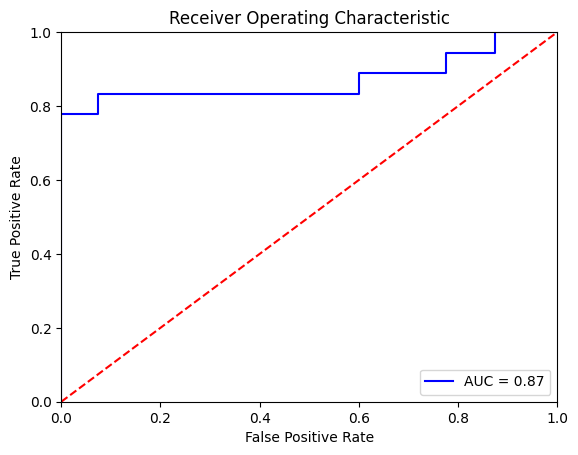

In [66]:
roc_plot(catboost_model,X_test,y_test)

In [68]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

def display_model_performance_metrics(true_labels, predicted_labels, predicted_probs=None, classes=[0,1]):
    # 📊 Classification Report
    print("📊 Classification Report:")
    print(classification_report(true_labels, predicted_labels, target_names=[f"Class {c}" for c in classes]))

    # 📉 Confusion Matrix
    print("\n📉 Confusion Matrix:")
    cm = confusion_matrix(true_labels, predicted_labels, labels=classes)
    print(cm)

    # Visualisasi Confusion Matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=[f"Pred {c}" for c in classes],
                yticklabels=[f"True {c}" for c in classes])
    plt.title("Confusion Matrix")
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    plt.show()

    # ✅ Accuracy
    acc = accuracy_score(true_labels, predicted_labels)
    print(f"\n✅ Accuracy: {acc:.2%}")

    # 📈 ROC-AUC (optional)
    if predicted_probs is not None:
        auc_score = roc_auc_score(true_labels, predicted_probs)
        print(f"📈 ROC-AUC Score: {auc_score:.4f}")


In [70]:
pip install mlxtend


   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------- -------- 1.0/1.4 MB 6.3 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 6.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


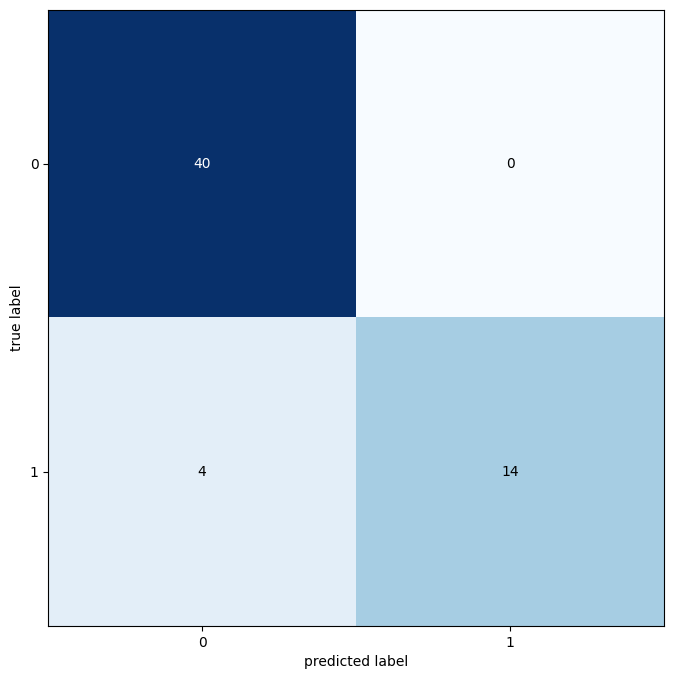

In [71]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(confusion_matrix(y_test,y_pred),figsize=(12,8))
plt.show()

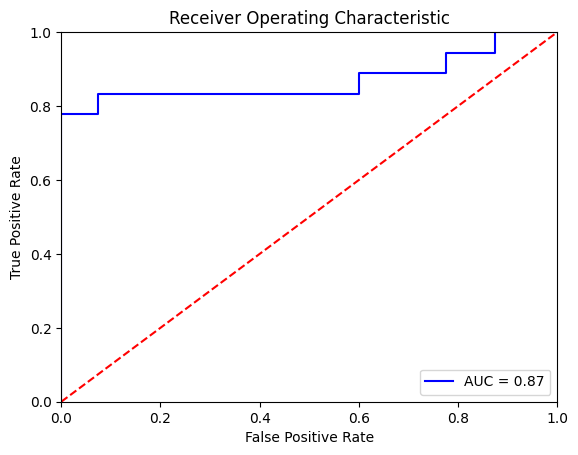

In [72]:
roc_plot(catboost_model,X_test,y_test)

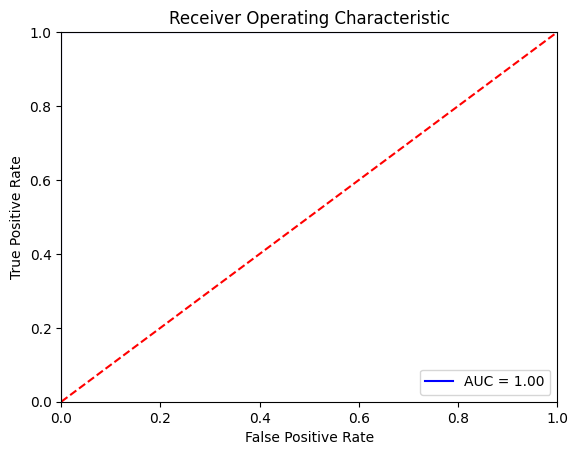

In [73]:
roc_plot(catboost_model,X_train,y_train)

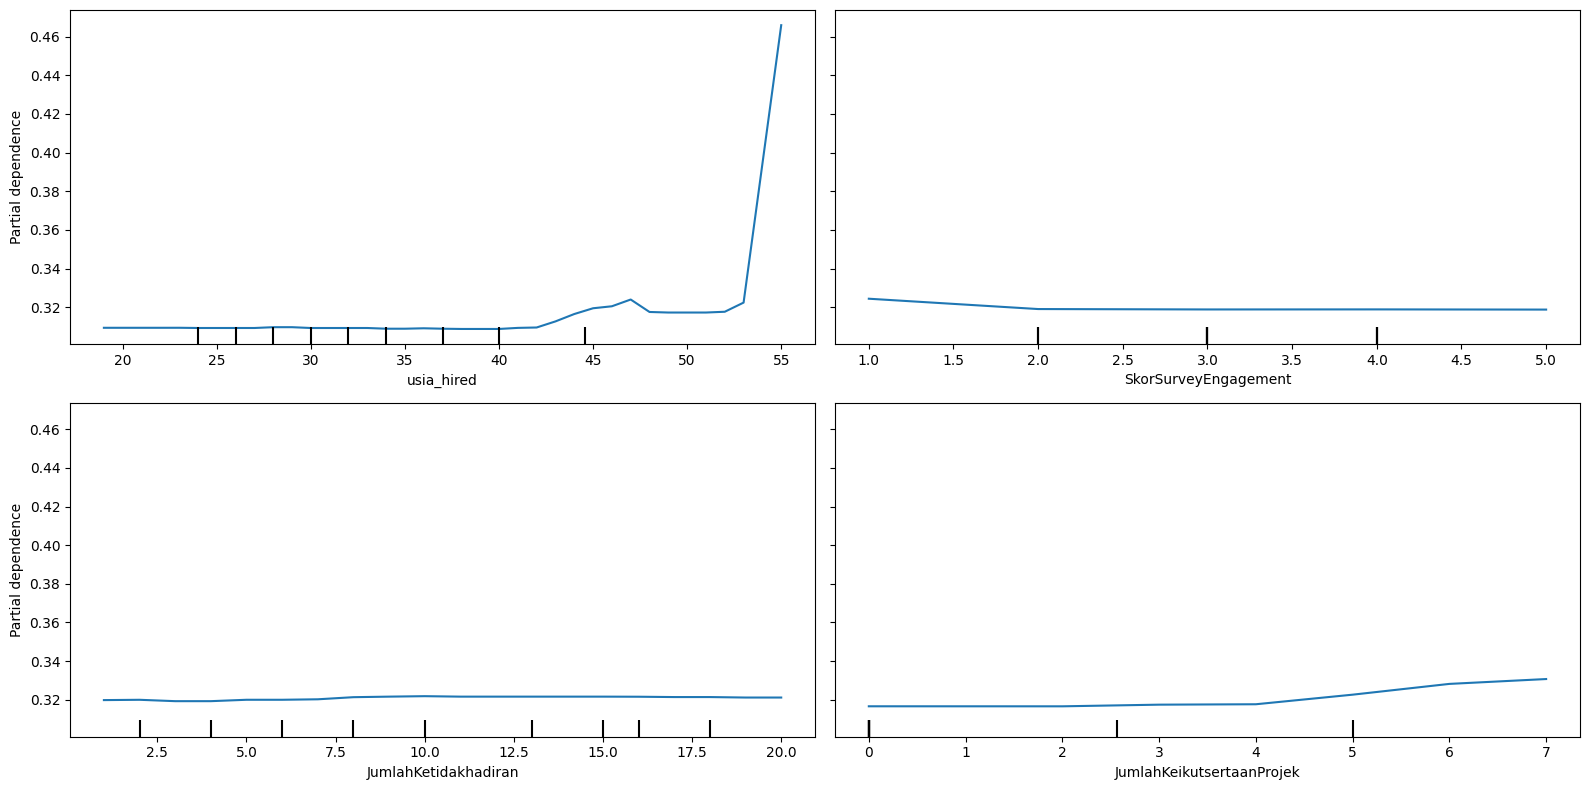

In [76]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Daftar fitur untuk divisualisasikan
fitur = [
    "usia_hired",
    "SkorSurveyEngagement",
    "JumlahKetidakhadiran",
    "JumlahKeikutsertaanProjek"
]

# Buat subplot 2x2
fig, ax = plt.subplots(2, 2, figsize=(16, 8))

# Visualisasikan Partial Dependence
PartialDependenceDisplay.from_estimator(
    catboost_model, 
    X_tl, 
    features=fitur, 
    ax=ax
)

# Tata letak agar tidak tumpang tindih
plt.tight_layout()
plt.show()


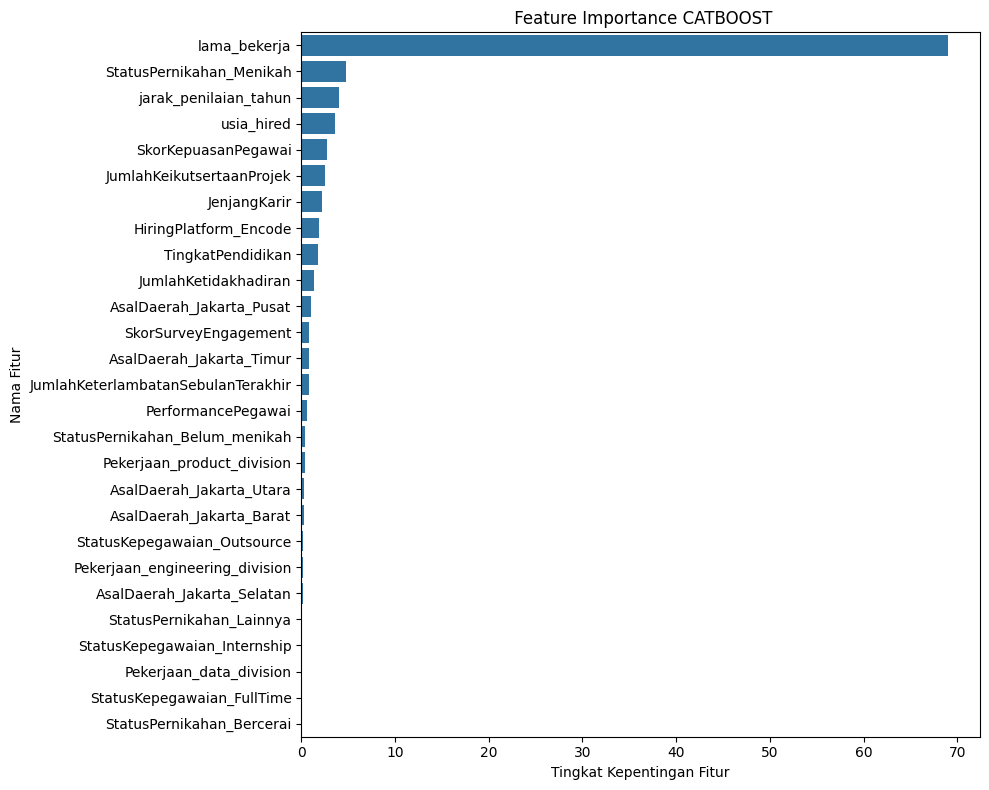

In [80]:
feature_names = X_tl.columns
def tampilkan_fitur_penting(nilai_importansi, nama_fitur, jenis_model):
    """
    Menampilkan grafik batang fitur-fitur paling berpengaruh dalam model machine learning.

    Parameters:
    - nilai_importansi: nilai numerik pentingnya setiap fitur
    - nama_fitur: nama-nama fitur yang digunakan dalam model
    - jenis_model: jenis model ML yang digunakan (untuk informasi tambahan jika dibutuhkan)
    """

    # Konversi ke array numpy
    array_importansi = np.array(nilai_importansi)
    array_nama_fitur = np.array(nama_fitur)

    # Buat DataFrame untuk menggabungkan nama dan skor pentingnya fitur
    df_importansi = pd.DataFrame({
        'Nama Fitur': array_nama_fitur,
        'Skor Penting': array_importansi
    })

    # Urutkan fitur dari yang paling penting ke paling rendah
    df_importansi.sort_values(by='Skor Penting', ascending=False, inplace=True)

    # Buat grafik batang
    plt.figure(figsize=(10, 8))
    sns.barplot(x='Skor Penting', y='Nama Fitur', data=df_importansi)

    # Tambahkan label dan judul
    plt.title(" Feature Importance " + jenis_model.upper())
    plt.xlabel("Tingkat Kepentingan Fitur")
    plt.ylabel("Nama Fitur")
    plt.tight_layout()
    plt.show()

# Panggil fungsi untuk menampilkan fitur penting berdasarkan model CatBoost
tampilkan_fitur_penting(catboost_model.get_feature_importance(), feature_names, 'CatBoost')


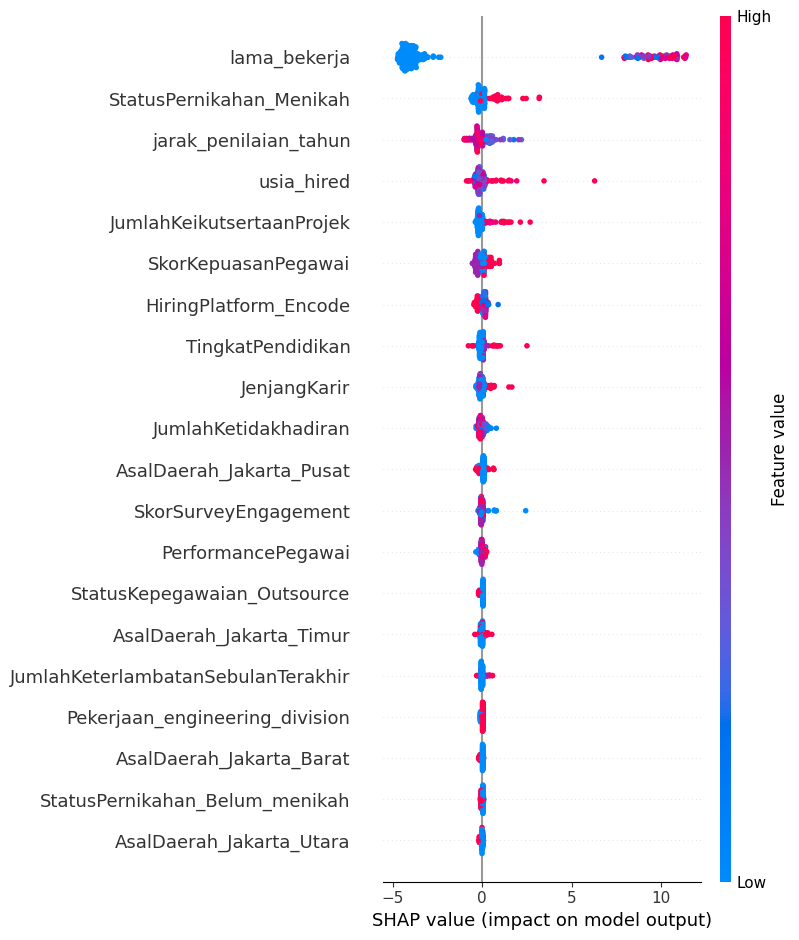

In [86]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Pastikan X_tl adalah DataFrame agar fitur bisa diberi label
if not isinstance(X_tl, pd.DataFrame):
    nama_fitur = [f"Fitur {i}" for i in range(X_tl.shape[1])]
    X_tl = pd.DataFrame(X_tl, columns=nama_fitur)
else:
    nama_fitur = X_tl.columns.tolist()

# Inisialisasi SHAP TreeExplainer (model_output tidak disebutkan agar default = "raw")
explainer = shap.TreeExplainer(catboost_model)

# Hitung nilai SHAP
shap_values = explainer.shap_values(X_tl)

# Visualisasi SHAP Summary Plot
plt.title("SHAP Summary Plot")
if isinstance(shap_values, list) and len(shap_values) == 2:
    shap.summary_plot(shap_values[1], X_tl, feature_names=nama_fitur)
else:
    shap.summary_plot(shap_values, X_tl, feature_names=nama_fitur)
